In [1]:
#import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data as a CSV file
data = pd.read_csv(Path('project4datafinal.csv'))
data.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)","SUBSTR(P.PROGRAM_ID,6,2)","SUBSTR(I.EXIT_STATUS,1,10)","DECODE(SUBSTR(I.EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,...,DIAGNOSIS_REASON,DIAGNOSIS_LEVEL,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID)
0,01016FD1342018BDC00008,FD,Graduated,1,10/22/2018,10/17/2018,7/9/2018,post adjudication,7/6/2020,prosecutor,...,substance-induced/related,Primary,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0
1,01016FD1342018BDC00008,FD,Graduated,1,10/22/2018,10/17/2018,7/9/2018,post adjudication,7/6/2020,prosecutor,...,substance-induced/related,NaN,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1
2,01016FD1342018BDC00017,FD,Graduated,1,10/22/2018,8/8/2018,8/13/2018,probation revocation,11/9/2020,defense attorney,...,substance-induced/related,Primary,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3
3,01016FD1342018BDC00019,FD,Graduated,1,11/5/2018,6/1/2018,9/5/2018,post adjudication,7/6/2020,defense attorney,...,substance-induced/related,Primary,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0
4,01016FD1342018BDC00019,FD,Graduated,1,11/5/2018,6/1/2018,9/5/2018,post adjudication,7/6/2020,defense attorney,...,substance-induced/related,NaN,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1


In [3]:
#Descriptive for our continuous variables
data.describe()

,"DECODE(SUBSTR(I.EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID)
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,0.606576,1.312018,6.678458,12.740363,0.001134,2.630385
std,0.488565,6.917632,15.645585,47.275409,0.033656,10.863360
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,5.000000,0.000000,1.000000
75%,1.000000,1.000000,7.000000,15.000000,0.000000,3.000000
max,1.000000,396.000000,396.000000,1664.000000,1.000000,495.000000


In [4]:
#Determine # of missing rows in the variables
data.isna().sum()

CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)                               0
SUBSTR(P.PROGRAM_ID,6,2)                                                    0
SUBSTR(I.EXIT_STATUS,1,10)                                                  0
DECODE(SUBSTR(I.EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)       0
ACCEPTANCE_DATE                                                            13
ARREST_DATE                                                                63
REFERRAL_DATE                                                             104
ACCEPTANCE_TYPE                                                            13
EXIT_DATE                                                                   0
REFERRAL_SOURCE                                                            64
DOB                                                                         0
GENDER                                                                      0
RACE                                                            

In [5]:
#View the types of variables 
data.dtypes

CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)                            object
SUBSTR(P.PROGRAM_ID,6,2)                                                 object
SUBSTR(I.EXIT_STATUS,1,10)                                               object
DECODE(SUBSTR(I.EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)     int64
ACCEPTANCE_DATE                                                          object
ARREST_DATE                                                              object
REFERRAL_DATE                                                            object
ACCEPTANCE_TYPE                                                          object
EXIT_DATE                                                                object
REFERRAL_SOURCE                                                          object
DOB                                                                      object
GENDER                                                                   object
RACE                                    

In [6]:
#Convert Data objects to Datetime variables 
data['ACCEPTANCE_DATE'] = pd.to_datetime(data['ACCEPTANCE_DATE'])

data['ARREST_DATE'] = pd.to_datetime(data['ARREST_DATE'])

data['REFERRAL_DATE'] = pd.to_datetime(data['REFERRAL_DATE'])
data['EXIT_DATE'] = pd.to_datetime(data['EXIT_DATE'])
data['DOB'] = pd.to_datetime(data['DOB'])

#Consider writing for loop


In [7]:

 #obtain Age from Date of Birth
# import datetime as dt

now = pd.to_datetime('now')

data['age'] = (now - data['DOB']).dt.total_seconds() / (60*60*24*365.25)
data['age'].describe()




count    4410.000000
mean       38.741098
std        11.703869
min         1.515980
25%        30.289423
50%        37.069710
75%        46.151161
max        81.080661
Name: age, dtype: float64

In [8]:
#Calculate difference in days between arrest to acceptance

data['time_arrest_accept'] = data['ACCEPTANCE_DATE'] - data['ARREST_DATE']

data['time_arrest_accept'].describe()


count                           4341
mean     243 days 07:22:50.836212856
std      416 days 04:34:20.068272860
min             -7670 days +00:00:00
25%                 58 days 00:00:00
50%                126 days 00:00:00
75%                307 days 00:00:00
max              10141 days 00:00:00
Name: time_arrest_accept, dtype: object

In [21]:
#Filter data based on reasonable age and differences between arrest dates and program acceptance
person_data = data[(data.age > 15) & (data.time_arrest_accept > '0 days')]
person_data.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)","SUBSTR(P.PROGRAM_ID,6,2)","SUBSTR(I.EXIT_STATUS,1,10)","DECODE(SUBSTR(I.EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,...,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID),age,time_arrest_accept
0,01016FD1342018BDC00008,FD,Graduated,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0,35.448902,5 days
1,01016FD1342018BDC00008,FD,Graduated,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1,35.448902,5 days
2,01016FD1342018BDC00017,FD,Graduated,1,2018-10-22,2018-08-08,2018-08-13,probation revocation,2020-11-09,defense attorney,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3,32.897225,75 days
3,01016FD1342018BDC00019,FD,Graduated,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0,32.489286,157 days
4,01016FD1342018BDC00019,FD,Graduated,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1,32.489286,157 days


In [22]:
#Display duplicate data within the dataframe
person_data[person_data.duplicated(keep=False)]

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)","SUBSTR(P.PROGRAM_ID,6,2)","SUBSTR(I.EXIT_STATUS,1,10)","DECODE(SUBSTR(I.EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,...,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID),age,time_arrest_accept


In [23]:
#Rename Variables
person_data = person_data.rename(columns={"DECODE(SUBSTR(EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)": 'GRADUATED',
                              "CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)": 'PARTICIPANT_ID', 
                              'SUBSTR(P.PROGRAM_ID,6,2)': 'PROGRAM_TYPE',
                              'COUNT(DISTINCTSI.SANC_INCENT_ID)': 'No_SANC_INCENT',
                              'COUNT(DISTINCTT.TREATMENT_ID)': 'No_TREATMENTS',
                              'COUNT(DISTINCTDT.DRUG_TEST_ID)': 'No_DRUG_TEST',
                              'COUNT(DISTINCTEA.EMP_ASSIST_ID)': 'No_EMP_ASSIST',
                              'COUNT(DISTINCTJS_HEARING_ID)': 'No_HEARING',
                              'age': 'AGE',
                              'time_arrest_accept': 'DAYS_TO_ACCEPTANCE'
                              })
person_data.head()

,PARTICIPANT_ID,PROGRAM_TYPE,"SUBSTR(I.EXIT_STATUS,1,10)","DECODE(SUBSTR(I.EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,...,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,No_SANC_INCENT,No_TREATMENTS,No_DRUG_TEST,No_EMP_ASSIST,No_HEARING,AGE,DAYS_TO_ACCEPTANCE
0,01016FD1342018BDC00008,FD,Graduated,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0,35.448902,5 days
1,01016FD1342018BDC00008,FD,Graduated,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1,35.448902,5 days
2,01016FD1342018BDC00017,FD,Graduated,1,2018-10-22,2018-08-08,2018-08-13,probation revocation,2020-11-09,defense attorney,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3,32.897225,75 days
3,01016FD1342018BDC00019,FD,Graduated,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0,32.489286,157 days
4,01016FD1342018BDC00019,FD,Graduated,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1,32.489286,157 days


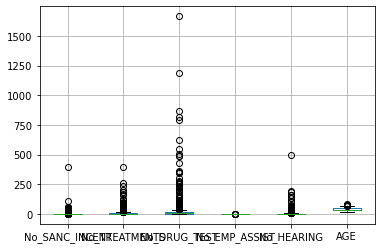

In [25]:
 import seaborn as sns

# # a = sns.boxplot("No_SANC_INCENT", "No_TREATMENTS", "No_DRUG_TEST", "No_EMP_ASSIST", "No_HEARING", "age", "time_arrest_accept", data=data2)
# # plt.show()
# data2.dtypes
#Boxplot of continuous variables in the dataset. 
boxplot = person_data.boxplot(column=["No_SANC_INCENT", "No_TREATMENTS", "No_DRUG_TEST", "No_EMP_ASSIST", "No_HEARING", "AGE"])

#work to expand box to make it visable
#consider truncating if value >=... the value=... before normalizing because values will be off

#####Statistically test of outliers is another option: IsolationForest in SKLearn

#Need to recode that 'time_arrest_accept'*******************************************

In [27]:
#correlation Table
variables = person_data[["No_SANC_INCENT", "No_TREATMENTS", "No_DRUG_TEST", "No_EMP_ASSIST", "No_HEARING", "AGE"]]
variables.corr(method='spearman')
#These are spearman correlation coefficients for non-normal data.  
#Some of the Pearson correlations are high, but not appropriate for non-normal data. 

,No_SANC_INCENT,No_TREATMENTS,No_DRUG_TEST,No_EMP_ASSIST,No_HEARING,AGE
No_SANC_INCENT,1.000000,0.331627,0.364326,0.005840,0.441061,-0.021762
No_TREATMENTS,0.331627,1.000000,0.573615,0.033823,0.494266,-0.004879
No_DRUG_TEST,0.364326,0.573615,1.000000,0.023611,0.469703,0.087704
No_EMP_ASSIST,0.005840,0.033823,0.023611,1.000000,-0.016823,0.011439
No_HEARING,0.441061,0.494266,0.469703,-0.016823,1.000000,-0.003113
AGE,-0.021762,-0.004879,0.087704,0.011439,-0.003113,1.000000


<AxesSubplot:>

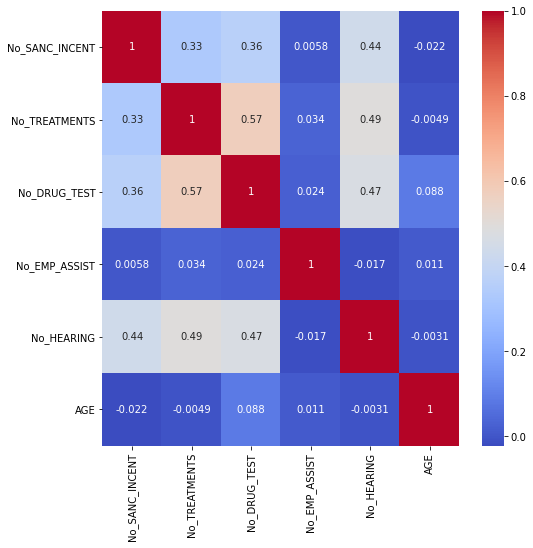

In [28]:
#Spearman correlation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(variables.corr(method='spearman'), annot=True, cmap="coolwarm")

In [29]:
 #Read the data as a CSV file
EMPLOY_ED = pd.read_csv(Path('emp_educ_income_final.csv'))
EMPLOY_ED.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)",EDUCATION_LEVEL,EMP_STATUS,INCOME_LEVEL,RESIDENCE_COUNTY,RISK_LEVEL
0,01034MH147f08b22e5-b058-447b-b358-2b6040d12a4f,some high,unemployed,No income,Ware,NaN
1,06038VC1169288402d-c5ad-4eb8-ae24-48ee2f0c6a8a,some college,full-time,"$25,000-$34,999",Carroll,low
2,10107FT1027dded030-86bf-49e7-91eb-7a8a2af8a111,high school/GED,full-time,"$15,000-$19,999",Newton,low
3,04044FD142f288ab8d-5d6e-4bb8-a365-5f527adb6e84,some college,disability,"$10,000-$14,999",DeKalb,NaN
4,02037FD101727fe12d-2089-4041-87ed-918e818d0c13,middle,unemployed,No income,Berrien,NaN


In [30]:
#load in employment and education data
EMPLOY_ED = EMPLOY_ED.rename(columns={"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)":'PARTICIPANT_ID'})
EMPLOY_ED.head()

,PARTICIPANT_ID,EDUCATION_LEVEL,EMP_STATUS,INCOME_LEVEL,RESIDENCE_COUNTY,RISK_LEVEL
0,01034MH147f08b22e5-b058-447b-b358-2b6040d12a4f,some high,unemployed,No income,Ware,NaN
1,06038VC1169288402d-c5ad-4eb8-ae24-48ee2f0c6a8a,some college,full-time,"$25,000-$34,999",Carroll,low
2,10107FT1027dded030-86bf-49e7-91eb-7a8a2af8a111,high school/GED,full-time,"$15,000-$19,999",Newton,low
3,04044FD142f288ab8d-5d6e-4bb8-a365-5f527adb6e84,some college,disability,"$10,000-$14,999",DeKalb,NaN
4,02037FD101727fe12d-2089-4041-87ed-918e818d0c13,middle,unemployed,No income,Berrien,NaN


In [31]:
#join the employment with the court and treatment data
joined = person_data.merge(EMPLOY_ED, on='PARTICIPANT_ID', how='inner')
joined.head(10)
joined.to_csv('joined_df.csv', index=False)